<a href="https://colab.research.google.com/github/nestorm94/Aprendizaje_Maquinas/blob/main/Ejercicio_california_housing_validaci%C3%B2n_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [ ]:
train = pd.read_csv("/content/sample_data/california_housing_train.csv", header=None)
test = pd.read_csv("/content/sample_data/california_housing_test.csv",header =None)

In [ ]:
X = train.iloc[1:, 1:].to_numpy()
y = train.iloc[1:,0].to_numpy()

In [ ]:
X_hut = test.iloc[1:, 1:].to_numpy()
y_hut = test.iloc[1:,0].to_numpy()

In [ ]:
result = cross_validate(DecisionTreeClassifier(max_depth=10),
                        X, y,cv=10,scoring="accuracy",
                        return_train_score=True,
                        return_estimator=True)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
result

{'fit_time': array([1.62675595, 1.39779449, 1.15986419, 1.16619635, 1.16136885,
        1.16673446, 1.13106394, 1.1256218 , 1.13461566, 1.28589892]),
 'score_time': array([0.01334667, 0.00812507, 0.0078907 , 0.0078299 , 0.00788021,
        0.00810146, 0.00757408, 0.0080421 , 0.01066208, 0.01168656]),
 'estimator': [DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10)],
 'test_score': array([0.01529412, 0.04      , 0.04882353, 0.04941176, 0.05470588,
        0.06235294, 0.06764706, 0.05941176, 0.06294118, 0.03764706]),
 'train_score': array([0.21673203, 0.20640523, 0.20686275, 0.20045752, 0.20052288,
        0.19385621, 0.1879085 , 0.18816993, 0.189

In [ ]:
print("acc train: {:.2f}% +- {:.2f}".format(result["train_score"].mean()*100,result['train_score'].std()*100))
print("acc test: {:.2f}% +- {:.2f}".format(result["test_score"].mean()*100,result['test_score'].std()*100))

acc train: 19.78% +- 0.95
acc test: 4.98% +- 1.48


In [ ]:
res_5 = cross_validate(DecisionTreeClassifier(max_depth=50),
                        X, y,cv=10,scoring="accuracy",
                        return_train_score=True,
                        return_estimator=True)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
print("acc train: {:.2f}% +- {:.2f}".format(res_5["train_score"].mean()*100,res_5['train_score'].std()*100))
print("acc test: {:.2f}% +- {:.2f}".format(res_5["test_score"].mean()*100,res_5['test_score'].std()*100))

acc train: 100.00% +- 0.00
acc test: 5.26% +- 1.72


In [ ]:
res_100 = cross_validate(DecisionTreeClassifier(max_depth=100),
                        X, y,cv=10,scoring="accuracy",
                        return_train_score=True,
                        return_estimator=True)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
print("acc train: {:.2f}% +- {:.2f}".format(res_100["train_score"].mean()*100,res_100['train_score'].std()*100))
print("acc test: {:.2f}% +- {:.2f}".format(res_100["test_score"].mean()*100,res_100['test_score'].std()*100))

acc train: 100.00% +- 0.00
acc test: 5.38% +- 1.74


In [ ]:
modelo = DecisionTreeClassifier(max_depth=100)

In [ ]:
modelo.fit(X, y)

DecisionTreeClassifier(max_depth=100)

In [ ]:
modelo.predict(X_hut)

array(['-122.010000', '-118.300000', '-118.030000', ..., '-119.820000',
       '-118.250000', '-119.690000'], dtype=object)

In [ ]:
print("trein:",accuracy_score(y, modelo.predict(X))*100,"%")

print("val:",accuracy_score(y_hut, modelo.predict(X_hut))*100,"%")

trein: 100.0 %
val: 9.5 %


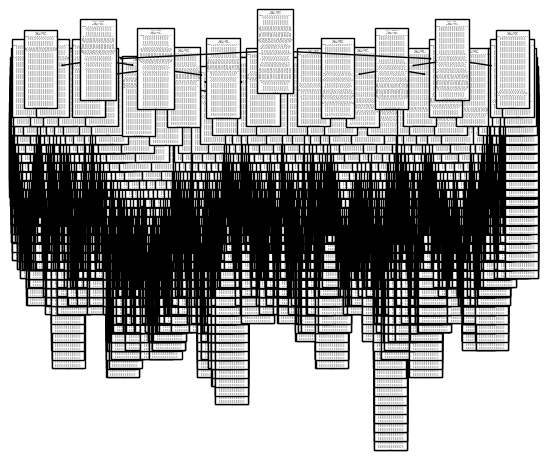

In [ ]:
plot_tree(modelo)